<a href="https://colab.research.google.com/github/DUMPETIINITHIN/Exploratory-Data-Analysis-on-Retail-Sales-Data/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:

plt.style.use("seaborn-v0_8")
sns.set_theme()


In [68]:
df = pd.read_csv("/content/drive/MyDrive/datasets/retail_sales_dataset.csv")
df
print(df.head())
print(df.columns)
print("\nDataset Info:")
df.info()
df.drop_duplicates(inplace=True)

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #  

In [69]:
for col in df.columns:
    if "date" in col.lower():
        df[col] = pd.to_datetime(df[col])
        date_col = col
        break
sales_col = None
for col in df.columns:
    if "sale" in col.lower() or "amount" in col.lower():
        sales_col = col
        break

In [70]:
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)
print(df.describe())

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

In [71]:
df[sales_col].mean()
df[sales_col].median()
df[sales_col].std()

559.997631555123

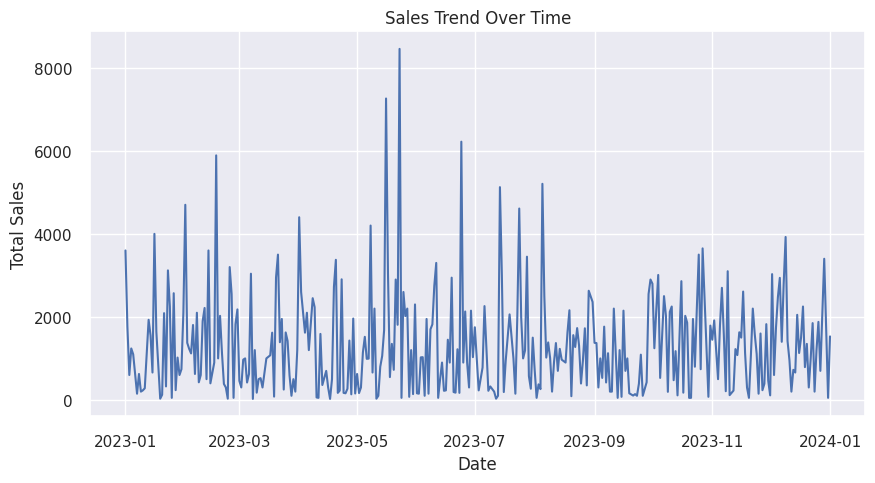

In [72]:
sales_over_time = df.groupby(date_col)[sales_col].sum()

plt.figure(figsize=(10,5))
plt.plot(sales_over_time)
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


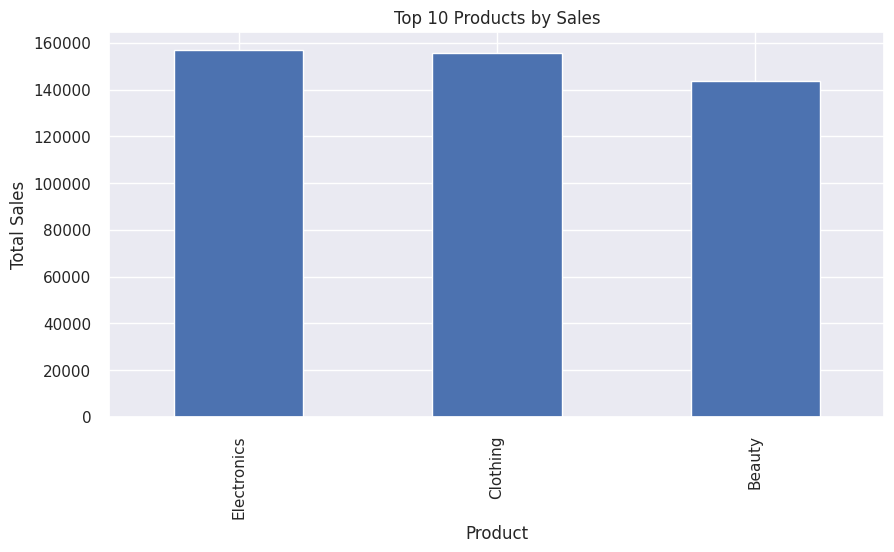

In [73]:
product_col = None
for col in df.columns:
    if "product" in col.lower():
        product_col = col
        break

if product_col:
    product_sales = df.groupby(product_col)[sales_col].sum().sort_values(ascending=False)

    plt.figure(figsize=(10,5))
    product_sales.head(10).plot(kind="bar")
    plt.title("Top 10 Products by Sales")
    plt.xlabel("Product")
    plt.ylabel("Total Sales")
    plt.show()

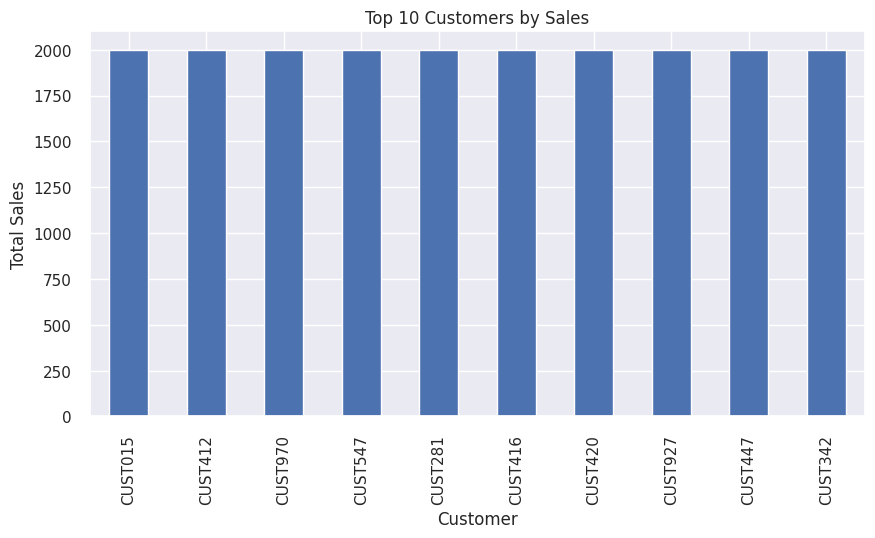

In [74]:
customer_col = None
for col in df.columns:
    if "customer" in col.lower():
        customer_col = col
        break

if customer_col:
    customer_sales = df.groupby(customer_col)[sales_col].sum().sort_values(ascending=False)

    plt.figure(figsize=(10,5))
    customer_sales.head(10).plot(kind="bar")
    plt.title("Top 10 Customers by Sales")
    plt.xlabel("Customer")
    plt.ylabel("Total Sales")
    plt.show()


In [75]:
region_col = None
for col in df.columns:
    if "region" in col.lower():
        region_col = col
        break

if region_col:
    region_sales = df.groupby(region_col)[sales_col].sum()

    plt.figure(figsize=(8,5))
    region_sales.plot(kind="bar")
    plt.title("Sales by Region")
    plt.xlabel("Region")
    plt.ylabel("Total Sales")
    plt.show()

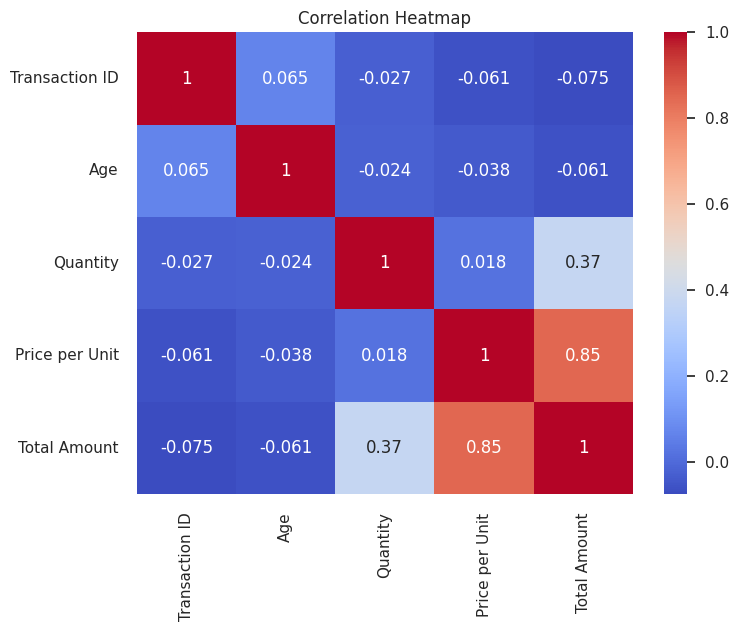

In [76]:

numeric_cols = df.select_dtypes(include=np.number)

if numeric_cols.shape[1] > 1:
    plt.figure(figsize=(8,6))
    sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

In [77]:
print("Stock more inventory during high-sales periods.")
print("Focus marketing on top-selling products.")
print("Retain high-value customers using loyalty programs.")
print("Improve performance in low-revenue regions.")

Stock more inventory during high-sales periods.
Focus marketing on top-selling products.
Retain high-value customers using loyalty programs.
Improve performance in low-revenue regions.
